<a href="https://colab.research.google.com/github/francji1/01ZLMA/blob/main/R/01ZLMA_ex04_GLM_model_testing_and_selection_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01ZLMA Exercise 04 - HW Solution 

## Solution of  Problem 7.5. from: Peter K. Dunn · Gordon K. Smyth
Generalized Linear Models With Examples in R
https://link.springer.com/content/pdf/10.1007/978-1-4419-0118-7.pdf



Nambe Mills, Santa Fe, New Mexico [2, 7], is a tableware manufacturer.
After casting, items produced by Nambe Mills are shaped, ground, buffed, and
polished. In 1989, as an aid to rationalizing production of its 100 products, the company recorded the total grinding and polishing times and the diameter of
each item (Table 5.3; data set: nambeware). 


Problem 6.11 from the book:

Consider the item price y and the item diameter x. In Problem 5.26, a glm was proposed for these data.

1. Fit this GLM using R, and write down the fitted model.
2. Determine the standard error for each regression parameter.
3. Compute the residual deviance.
4. Compute the mean deviance estimate of φ.
5. Compute the Pearson estimate of φ.

## Your turn: Problem 7.5 from the book

1. Use a Wald test to determine if diameter is significant.
2. Use a score test to determine if diameter is significant.
3. Use a likelihood ratio test to determine if diameter is significant.
296 REFERENCES
4. Compare the results from the Wald, score and likelihood ratio tests. Comment.
5. Is the saddlepoint approximation expected to be accurate? Explain.
6. Is the Central Limit Theorem expected to be accurate? Explain.
7. Find the 95% Wald confidence intervals for the regression coefficients.
8. Plot the price against diameter, and show the relationship described by
the fitted model. Also plot the lines indicating the lower and upper 95%
confidence intervals for these fitted value

In [1]:
library(tidyverse)
library(lubridate)
library(MASS)

#For sure: set dplyr functions
select    <- dplyr::select;
rename    <- dplyr::rename;
mutate    <- dplyr::mutate; 
summarize <- dplyr::summarize;
arrange   <- dplyr::arrange;
slice     <- dplyr::slice;
filter    <- dplyr::filter;
recode    <- dplyr::recode

install.packages("GLMsData")
library(GLMsData)

install.packages("GGally")
library(GGally)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’


Registered S3 method overwritten by 'GGally':
  method from   

In [2]:
data(nambeware)
head(nambeware)
summary(nambeware)
?nambeware

,Type,Diam,Time,Price
,<fct>,<dbl>,<dbl>,<dbl>
1,CassDish,10.7,47.65,144
2,CassDish,14.0,63.13,215
3,CassDish,9.0,58.76,105
4,Bowl,8.0,34.88,69
5,Dish,10.0,55.53,134
6,CassDish,10.5,43.14,129


       Type         Diam            Time            Price       
 Bowl    :23   Min.   : 5.00   Min.   : 12.02   Min.   : 21.50  
 CassDish:10   1st Qu.: 8.25   1st Qu.: 22.21   1st Qu.: 47.25  
 Dish    : 7   Median :11.00   Median : 31.46   Median : 75.00  
 Plate   : 9   Mean   :10.93   Mean   : 35.82   Mean   : 86.38  
 Tray    :10   3rd Qu.:13.00   3rd Qu.: 45.03   3rd Qu.:107.00  
               Max.   :25.00   Max.   :109.38   Max.   :260.00  

`geom_smooth()` using formula = 'y ~ x'


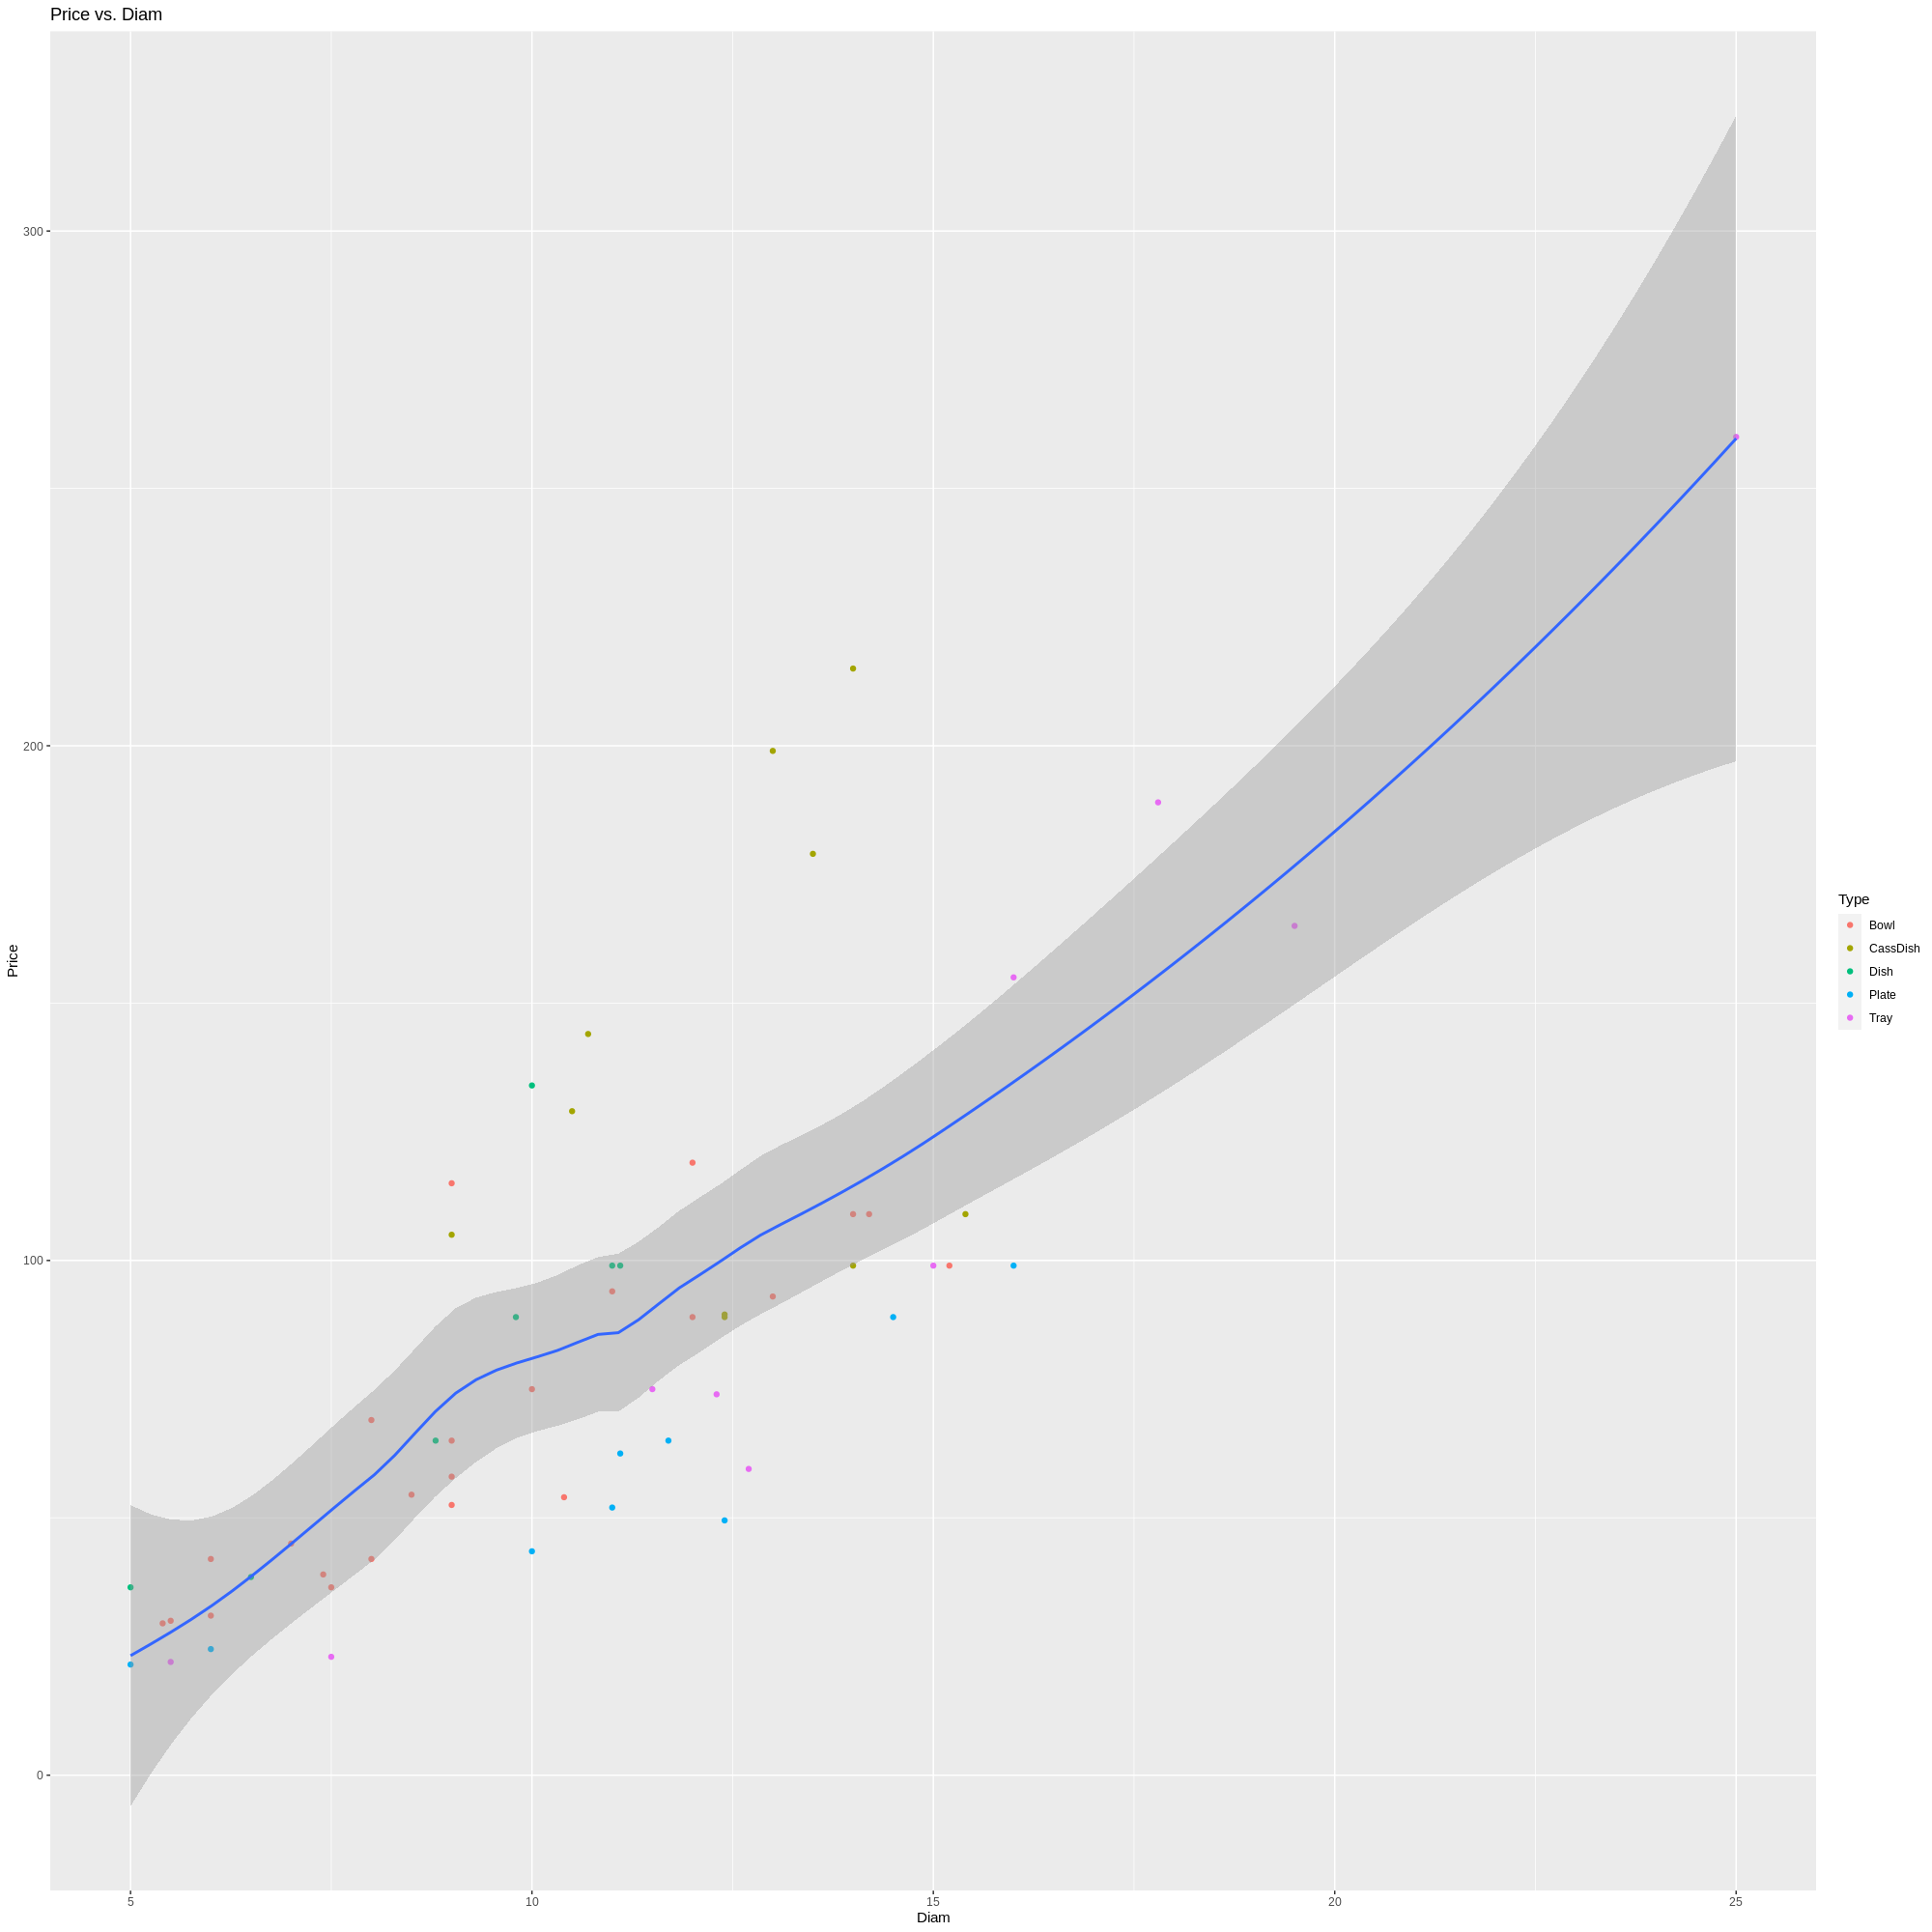

In [3]:
options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)
ggplot(nambeware, aes(x = Diam, y = Price)) + 
  geom_point(aes(colour = Type)) + 
  geom_smooth(method = "loess") +
  labs(title = "Price vs. Diam")


In [5]:
lm_model <- lm(Price ~ Diam, data=nambeware)
summary(model)

ERROR: ignored

In [6]:
plot(model, which = 2)

ERROR: ignored

In [ ]:
plot(model, which = 3)

In [ ]:
model <- glm( Price ~ Diam,
                   data=nambeware,
                   family = Gamma(link = "identity")
)
summary(model)

In [ ]:
cov_mat <- summary(model)$cov.scaled
round(cov_mat, digits=3)

![image.png](attachment:a1a22770-d883-4c7c-88b8-1934b4ba8407.png)

# Wald Test

In [ ]:
install.packages("aod")
library(aod)

In [ ]:
coef(summary(model))
confint(model, "Diam")

In [ ]:
wald.test(Sigma = vcov(model), b = coef(model), Terms = 1:1)

# Score Test

In [ ]:
install.packages("statmod") 
library(statmod)

In [ ]:
glm.scoretest(model, nambeware$Diam)

In [ ]:
p_val <- 2 * pnorm( abs(z_stat), lower.tail=FALSE)
p_val

# LR Test

In [ ]:
model_0 <- glm( Price ~ 1, data=nambeware, family = Gamma(link = "identity"))
model_1 <- glm( Price ~ Diam, data=nambeware, family = Gamma(link = "identity"))

In [ ]:
print(cbind( "Dev(m0)"= deviance(model_0), "Dev(m1)" = deviance(model_1) ))

print(cbind( "df(m0)" = df.residual(model_0), "df(m1)" = df.residual(model_1)))

L <- deviance(model_0) - deviance(model_1)
L

pchisq(L, df.residual(model_0) - df.residual(model_1), lower.tail=FALSE )

# Test comparison

The Wald and Score tests give similar p-values. We know that the Wald test is symetric and the Score and the LR tests are not symetric. All of the tests tell us however that the `Diam` parameter is significant in estiamting the `Price` (that it is rightfully nonzero)

# Saddle point approximation

The saddle point approximation can be thought of as the result of the Wald test (since it gives us the difference of the last two iterations of the convergence). We can say that it is accurate, because the p-value of the Wald test is very small. In other words the data would have to be very specifically drawn if the convergence would be false and the test passed with this p-value.

# CLT

In fact in these tests we are relying on the CLT to be accurate since these tests are only asymptotic. We can guess whether the CLT should be accurate or not through intuition of the distribution of the parameters (in fact the tests are correct directly (not asymptoticaly) only if the parameters are distributed normaly) and the sample size, which in our case is:

In [ ]:
nrow(nambeware)

My guess would be that this amount of samples is sufficient.

# 95% confidence interval

Wald statistic confidence intervals are the default for the computing of the confidence intervals of the model coeficients.

In [ ]:
confint(model, "Diam", level = 0.95)

In [ ]:
coef(model)

# Fitted model interpretation and the confidence intervals

In [ ]:
ggplot(nambeware, aes(x = Diam, y = Price)) + 
  geom_point(aes(colour = Type)) + 
  geom_abline(slope = coef(model)[2], intercept = coef(model)[1]) +
  geom_abline(slope = confint(model, "Diam", level = 0.95)[2], intercept = coef(model)[1], name = "Prediction") +
  geom_abline(slope = confint(model, "Diam", level = 0.95)[1], intercept = coef(model)[1]) +
  labs()